<a href="https://colab.research.google.com/github/sigvehaug/Introduction-to-Python-for-Medical-Researchers/blob/master/07_-nteractive-Plotting-Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7 Interactive plotting

Jupyter offers a solution to interact with various types of plots: ipywidget

In [ ]:
from ipywidgets import interact, IntSlider

The interact() function takes as input a function and a value for that function. That function should plot or print some information. interact() then creates a widget, typically a slider, executes the plotting function and adjusts the ouptut when the slider is moving. For example:

In [ ]:
def square(num=1):
  print(str(num)+' squared is: '+ str(num*num))

In [ ]:
square(3)

3 squared is: 9


In [ ]:
interact(square, num=(0,20,1))

interactive(children=(IntSlider(value=1, description='num', max=20), Output()), _dom_classes=('widget-interact…

<function __main__.square>

Depending on the values passed as arugments, interact() will create different widgets. E.g. with text:

In [ ]:
def f(x):
  return x
interact(f,x='Sigve')

interactive(children=(Text(value='Sigve', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f>

An important note for our imaging topic: when moving the slider, the function is continuously updated. If the function does some computationally intensitve work, this might just overload the system. To avoid that, one can explicitly specifiy the slider type and its specificities:

In [ ]:
interact(square, num = IntSlider(min=-10, max=30, step=1, continous_update=False))

interactive(children=(IntSlider(value=0, description='num', max=30, min=-10), Output()), _dom_classes=('widget…

<function __main__.square>

If we want to scroll through our image stack we can do just that. Let's first define a function that cat plot the three RGB channels.

In [ ]:
from skimage import io
url_pre = 'https://raw.githubusercontent.com/sigvehaug/Introduction-to-Python-for-Medical-Researchers/master/Data/'
url_name = 'ISIC_0000000.jpg'
url = url_pre + url_name
image = io.imread(url)

In [ ]:
import matplotlib.pyplot as plt
def plot_plane(t):
  plt.imshow(image[:,:,t])
  plt.show()


In [ ]:
interact(plot_plane, t = IntSlider(min=0, max=2, step=1, continous_update=False))

interactive(children=(IntSlider(value=0, description='t', max=2), Output()), _dom_classes=('widget-interact',)…

<function __main__.plot_plane>

## Exercise

- Make a list with all the filenames in dataset of the course by using a for loop and if statements
- Read all the files into a list of images (use try and except to skip non existing files)
- Use interact to call a function which makes it possible to scroll hrough the pictures with a ruler

In [ ]:
url_pre = 'https://raw.githubusercontent.com/sigvehaug/Introduction-to-Python-for-Medical-Researchers/master/Data/'

In [ ]:
url_names = []
for i in range(102):
  if i < 10:
    url_names.append(url_pre+'ISIC_000000'+str(i)+'.jpg')
  elif i < 17:
    url_names.append(url_pre+'ISIC_00000'+str(i)+'.jpg')
  elif i < 66:
    url_names.append(url_pre+'ISIC_00000'+str(i)+'_downsampled.jpg')
  elif i < 77:
    url_names.append(url_pre+'ISIC_00000'+str(i)+'.jpg')
  elif i < 100:
    url_names.append(url_pre+'ISIC_00000'+str(i)+'_downsampled.jpg')
  else:
    url_names.append(url_pre+'ISIC_0000'+str(i)+'_downsampled.jpg')
#for url in url_names:
#  print(url)

In [ ]:
#for url in url_names:
#  print(url)

In [ ]:
#import os
#os.listdir('/content/')

In [ ]:
#from skimage import io
#io.imread(url_names[0])

In [ ]:
images = []
for url in url_names:
  try:
    images.append(io.imread(url))
  except:
    continue


In [ ]:
images

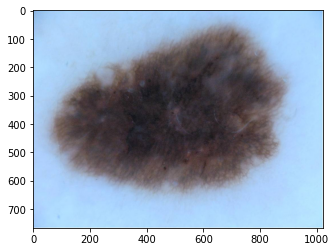

In [ ]:
plt.imshow(images[0])

In [ ]:
def plot_image(i,r1,r2,c1,c2, channel):
  print('This is a little app where you can show an image in the dataset by selecting the (rectangular) pixel range to be shown. ')  
  img = images[i]
  plt.imshow(image[r1:r2,c1:c2,channel])
  plt.show()

In [ ]:
image[0].shape

(1022, 3)

In [ ]:
interact(plot_image, i = IntSlider(min=0,max=len(images), step=1 , continous_apdate=False), r1 = (0,500,1), r2=(0,1022,1), c1 = (0,500,1), c2=(0,800,1), channel=(0,2,1) )

interactive(children=(IntSlider(value=0, description='i', max=95), IntSlider(value=250, description='r1', max=…

<function __main__.plot_image>